In [46]:
NAMES = ["Andrew Fidler",
         "Ryan Da Silva",
         "Mike Suderman",
         "Pavel Demin",
         "Saewan Koh",
         ]
GROUP = "4"

In [47]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.api as sm

In [48]:
# read data
on_df = pd.read_csv('1410037601_databaseLoadingData.csv')

# drop redundant columns
on_df = on_df[[
    'REF_DATE',
    'Class of worker',
    'North American Industry Classification System (NAICS)',
    'VALUE',
    'STATUS'
]]
# convert date column
on_df.REF_DATE = on_df.REF_DATE.astype('datetime64')

print(on_df.head())

    REF_DATE                         Class of worker  \
0 2011-10-01  Total employed, all classes of workers   
1 2011-11-01  Total employed, all classes of workers   
2 2011-12-01  Total employed, all classes of workers   
3 2012-01-01  Total employed, all classes of workers   
4 2012-02-01  Total employed, all classes of workers   

  North American Industry Classification System (NAICS)   VALUE STATUS  
0                     Total employed, all industries     6659.9    NaN  
1                     Total employed, all industries     6678.5    NaN  
2                     Total employed, all industries     6649.4    NaN  
3                     Total employed, all industries     6550.1    NaN  
4                     Total employed, all industries     6545.7    NaN  


In [82]:
# pivot table to show collected values
DF_PIVOT = on_df.pivot(index=["REF_DATE"], 
            columns=["Class of worker", "North American Industry Classification System (NAICS)"],
            values="VALUE")
DF_PIVOT.head()

Class of worker                                       Total employed, all classes of workers  \
North American Industry Classification System (NAICS)         Total employed, all industries   
REF_DATE                                                                                       
2011-10-01                                                                            6659.9   
2011-11-01                                                                            6678.5   
2011-12-01                                                                            6649.4   
2012-01-01                                                                            6550.1   
2012-02-01                                                                            6545.7   

Class of worker                                                               \
North American Industry Classification System (NAICS) Goods-producing sector   
REF_DATE                                                                       
2011-10-01                                                            1428.5   
2011-11-01                                                            1419.4   
2011-12-01                                                            1388.6   
2012-01-01                                                            1364.8   
2012-02-01                                                            1360.8   

Class of worker                                                                               \
North American Industry Classification System (NAICS) Agriculture [111-112, 1100, 1151-1152]   
REF_DATE                                                                                       
2011-10-01                                                                              84.7   
2011-11-01                                                                              84.7   
2011-12-01                                                                              81.5   
2012-01-01                                                                              78.6   
2012-02-01                                                                              77.1   

Class of worker                                                                                                                    \
North American Industry Classification System (NAICS) Forestry, fishing, mining, quarrying, oil and gas [21, 113-114, 1153, 2100]   
REF_DATE                                                                                                                            
2011-10-01                                                                                          36.4                            
2011-11-01                                                                                          37.3                            
2011-12-01                                                                                          34.9                            
2012-01-01                                                                                          36.3                            
2012-02-01                                                                                          36.8                            

Class of worker                                                       \
North American Industry Classification System (NAICS) Utilities [22]   
REF_DATE                                                               
2011-10-01                                                      51.4   
2011-11-01                                                      51.8   
2011-12-01                                                      50.3   
2012-01-01                                                      47.9   
2012-02-01                                                      49.6   

Class of worker                                                          \
North American Industry Classification System (NAICS) Construction [23]   
REF_DATE                     

In [182]:
# selecting only service industry
services = DF_PIVOT['Total employed, all classes of workers'].iloc[:, 7:]
services.head()

North American Industry Classification System (NAICS),Services-producing sector,"Wholesale and retail trade [41, 44-45]",Transportation and warehousing [48-49],"Finance, insurance, real estate, rental and leasing [52-53]","Professional, scientific and technical services [54]","Business, building and other support services [55-56]",Educational services [61],Health care and social assistance [62],"Information, culture and recreation [51, 71]",Accommodation and food services [72],Other services (except public administration) [81],Public administration [91]
REF_DATE,,,,,,,,,,,,
2011-10-01,5231.4,1002.1,322.5,490.0,546.0,303.4,464.4,748.6,305.9,402.0,280.1,366.4
2011-11-01,5259.1,1019.7,318.9,491.0,547.7,298.7,482.4,756.7,302.9,389.1,287.2,364.8
2011-12-01,5260.9,1014.5,320.3,485.6,548.4,291.7,485.7,761.5,307.1,399.2,284.8,362.0
2012-01-01,5185.3,986.4,314.4,489.6,550.0,279.3,479.7,756.6,293.3,388.5,290.8,356.8
2012-02-01,5184.9,978.3,304.9,498.5,546.8,285.2,484.9,753.2,299.0,387.4,285.9,360.7


In [183]:
# replacing values with % change from last period
services_per = services.apply(lambda x: x / (x.shift(1)) * 100 - 100)
services_per.head()

North American Industry Classification System (NAICS),Services-producing sector,"Wholesale and retail trade [41, 44-45]",Transportation and warehousing [48-49],"Finance, insurance, real estate, rental and leasing [52-53]","Professional, scientific and technical services [54]","Business, building and other support services [55-56]",Educational services [61],Health care and social assistance [62],"Information, culture and recreation [51, 71]",Accommodation and food services [72],Other services (except public administration) [81],Public administration [91]
REF_DATE,,,,,,,,,,,,
2011-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-01,0.529495,1.756312,-1.116279,0.204082,0.311355,-1.549110,3.875969,1.082020,-0.980713,-3.208955,2.534809,-0.436681
2011-12-01,0.034226,-0.509954,0.439009,-1.099796,0.127807,-2.343488,0.684080,0.634333,1.386596,2.595734,-0.835655,-0.767544
2012-01-01,-1.437016,-2.769837,-1.842023,0.823723,0.291758,-4.250943,-1.235330,-0.643467,-4.493650,-2.680361,2.106742,-1.436464
2012-02-01,-0.007714,-0.821168,-3.021628,1.817810,-0.581818,2.112424,1.084011,-0.449379,1.943403,-0.283140,-1.685007,1.093049


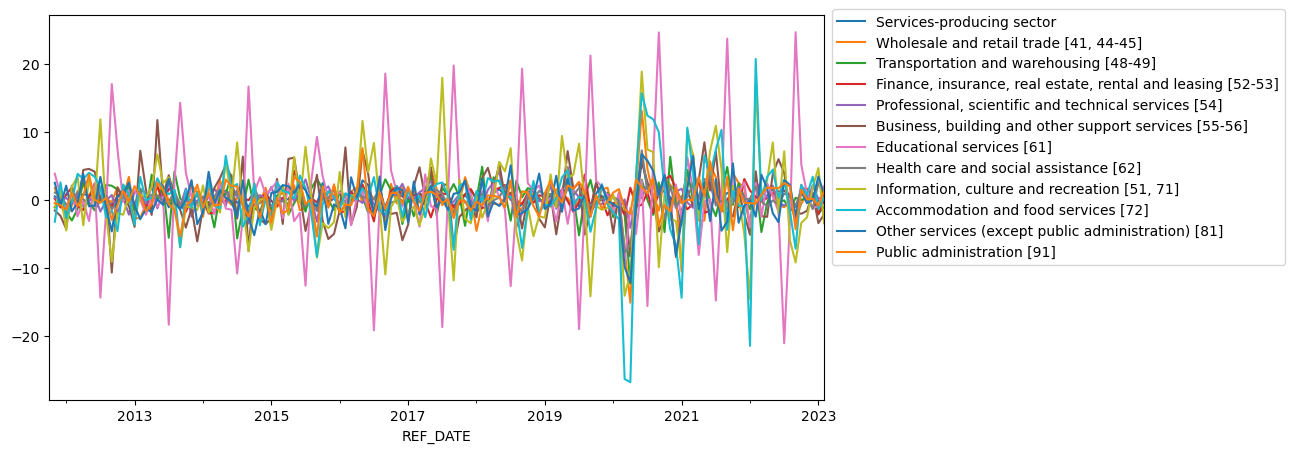

In [192]:
services_per.plot(kind='line',figsize=(10,5))
plt.legend(loc=(1.01,.35))

array([[<AxesSubplot:title={'center':'Services-producing sector'}>,
        <AxesSubplot:title={'center':'Wholesale and retail trade [41, 44-45]'}>,
        <AxesSubplot:title={'center':'Transportation and warehousing [48-49]'}>],
       [<AxesSubplot:title={'center':'Finance, insurance, real estate, rental and leasing [52-53]'}>,
        <AxesSubplot:title={'center':'Professional, scientific and technical services [54]'}>,
        <AxesSubplot:title={'center':'Business, building and other support services [55-56]'}>],
       [<AxesSubplot:title={'center':'Educational services [61]'}>,
        <AxesSubplot:title={'center':'Health care and social assistance [62]'}>,
        <AxesSubplot:title={'center':'Information, culture and recreation [51, 71]'}>],
       [<AxesSubplot:title={'center':'Accommodation and food services [72]'}>,
        <AxesSubplot:title={'center':'Other services (except public administration) [81]'}>,
        <AxesSubplot:title={'center':'Public administration [91]'}

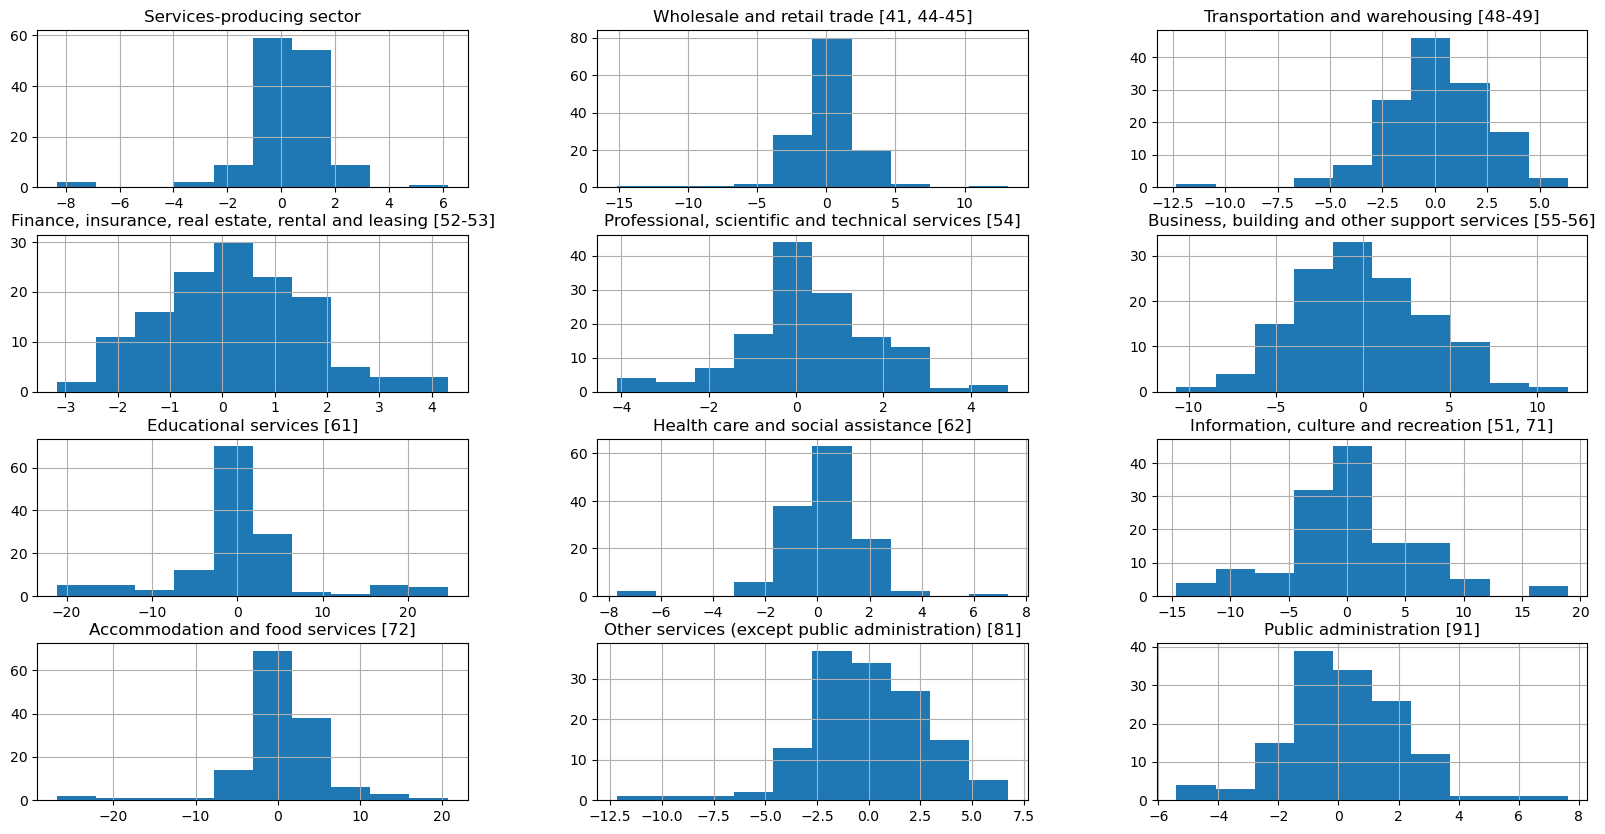

In [198]:
services_per.hist(figsize=(20,10))